In [10]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from pathlib import Path
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix    
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import tree
#import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz 
from sklearn.svm import LinearSVC   
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import accuracy_score


In [14]:
corpus_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\CORPUS')
project_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project')
data_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\Data')
endpoint="https://newsapi.org/v2/everything"
filename="newsApiData.csv"
nytimes_data =  "fav_sneaker_data.txt"
nike_vs_adidas_data =  "nike_vs_adidas_data.txt"
nike_reviews_data = "nike_reviews_data.csv"
twitter_data = "twitter_data.csv"
filtered_twitter_data = "filtered_twitter_data.csv"
nike_adidas_reviews_data = "nike_adidas_reviews_data.csv"
filtered_nike_adidas_reviews_data = "filtered_nike_adidas_reviews_data.csv"

In [19]:
filtered_df_path = data_path.joinpath(filtered_nike_adidas_reviews_data)
df_reviews = pd.read_csv('/content/sample_data/filtered_nike_adidas_reviews_data.csv', error_bad_lines=False)


In [ ]:
def lemmatization(text):
    word_net_lemmatizer = WordNetLemmatizer()
    words = str(text).split()
    words = [word_net_lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

def stemming_words(text):
    porter_stemmer = PorterStemmer()
    words = str(text).split()
    words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(words)

df_reviews['Review'] = df_reviews['Review'].apply(lemmatization)
df_reviews['Review'] = df_reviews['Review'].apply(stemming_words)

In [ ]:
vectorizer = TfidfVectorizer(token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',stop_words='english')
dtm_tf = vectorizer.fit_transform(df_reviews['Review'])
ColumnNames=vectorizer.get_feature_names_out()
        ## Build the data frame
MyDTM_DF=pd.DataFrame(dtm_tf.toarray(),columns=ColumnNames)
labels_DF = DataFrame(list(df_reviews['Brand']),columns=['labels'])
dfs = [labels_DF, MyDTM_DF]
labeled_df = pd.concat(dfs,axis=1, join='inner')
labeled_df.to_csv("/content/sample_data/vectorized_dt_nb_svm_data.csv",index=False)

In [23]:
nike_reviews  = df_reviews[df_reviews['Brand'] == 'nike']
none_nike_reviews = df_reviews[df_reviews['Brand'] != 'nike']

def DecisionTreeClassification(df_reviews,op_name):
        x = df_reviews['Review']
        y = df_reviews['Sentiment']
        
        x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)
        vectorizer = TfidfVectorizer(token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',stop_words='english')
        vectorizer.fit_transform(df_reviews['Review'])

        Train_X_Tfidf = vectorizer.transform(x_train)
        Test_X_Tfidf = vectorizer.transform(x_test)


        MyDT = DecisionTreeClassifier(criterion='gini',
                            splitter='best',
                            max_depth=7, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None)
        
                  
        MyDT.fit(Train_X_Tfidf, y_train)
        
        tree.plot_tree(MyDT)
        feature_names = vectorizer.get_feature_names_out() 
        dot_data = tree.export_graphviz(MyDT, out_file=None,
                            feature_names= feature_names,   
                            filled=True, rounded=True,  
                            special_characters=True)                                    
        graph = graphviz.Source(dot_data) 
        tempname=str(op_name+"Graph")
        graph.render(tempname) 
        
        #print("Prediction\n")
        DT_pred=MyDT.predict(Test_X_Tfidf)
        #print(DT_pred)
        print(MyDT.score(Test_X_Tfidf,y_test))

        # Evaluate the accuracy of the model
        accuracy = accuracy_score(y_test, DT_pred)
        print('Accuracy of Label:', accuracy)
           
        cm = confusion_matrix(y_test, DT_pred)
        print("\nThe confusion matrix is:")
        print(cm)
        # Visualize confusion matrix with heatmap
        plt.figure(figsize=(6,6))
        plt.title('Confusion Matrix')
        sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=list(df_reviews['Sentiment'].unique()), 
                    yticklabels=list(df_reviews['Sentiment'].unique()))
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()


0.5512820512820513
Accuracy of Label: 0.5512820512820513

The confusion matrix is:
[[31  0  7]
 [ 8  0  1]
 [19  0 12]]


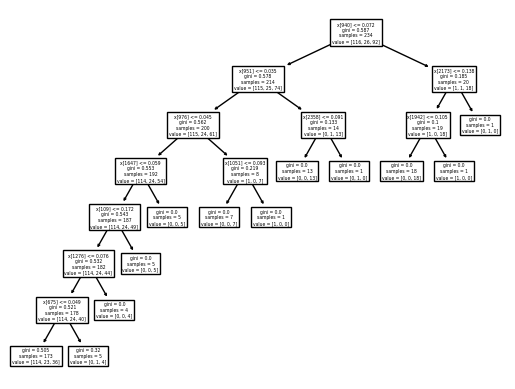

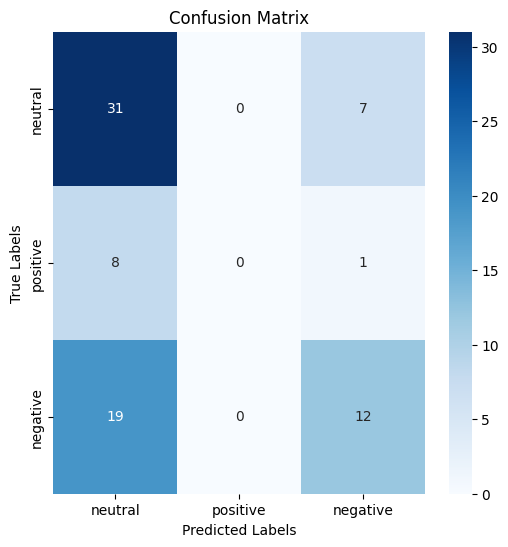

In [24]:
DecisionTreeClassification(nike_reviews,'nike')

0.5512820512820513
Accuracy of Label: 0.5512820512820513

The confusion matrix is:
[[36  3  9]
 [ 5  3  2]
 [14  2  4]]


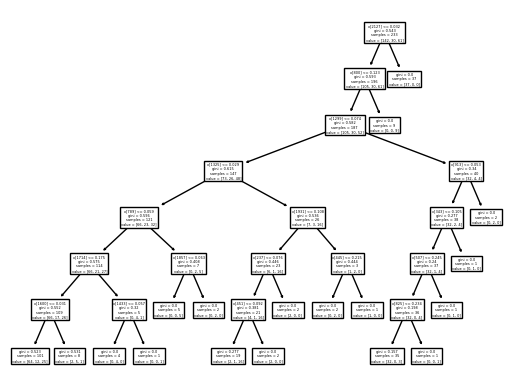

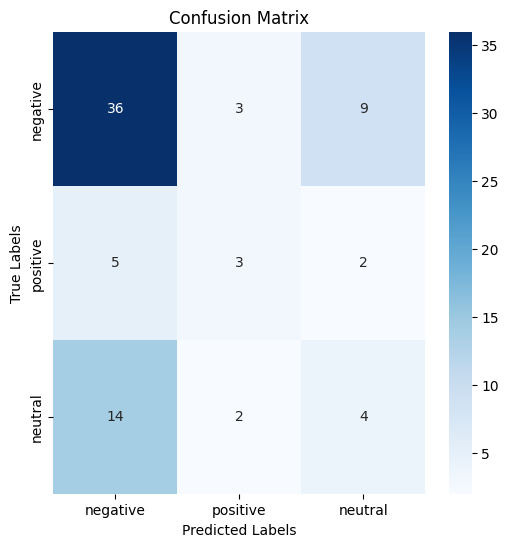

In [25]:
DecisionTreeClassification(none_nike_reviews,'none_nike')